In [13]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline 

In [14]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image

In [15]:
y_2019_df = pd.read_csv ('https://raw.githubusercontent.com/Ekaterina-Muravyeva/WHR/main/2019.csv')
y_2018_df = pd.read_csv ('https://raw.githubusercontent.com/Ekaterina-Muravyeva/WHR/main/2018.csv')
y_2017_df = pd.read_csv ('https://raw.githubusercontent.com/Ekaterina-Muravyeva/WHR/main/2017.csv')
y_2016_df = pd.read_csv ('https://raw.githubusercontent.com/Ekaterina-Muravyeva/WHR/main/2016.csv')
y_2015_df = pd.read_csv ('https://raw.githubusercontent.com/Ekaterina-Muravyeva/WHR/main/2015.csv')

In [16]:
y_2015 = y_2015_df.rename(columns={'Country': 'country_name',
                                'Region': 'region',
                                'Happiness Score': 'happiness_score_2015',
                               'Health (Life Expectancy)': 'lifespan_2015',
                               'Freedom': 'freedom_2015',
                               'Economy (GDP per Capita)': 'GDP_2015',
                               'Generosity': 'generosity_2015'})

In [17]:
y_2016 = y_2016_df.rename(columns={'Country': 'country_name',
                                'Happiness Score': 'happiness_score_2016',
                               'Health (Life Expectancy)': 'lifespan_2016',
                               'Freedom': 'freedom_2016',
                               'Economy (GDP per Capita)': 'GDP_2016',
                               'Generosity': 'generosity_2016'})

In [18]:
y_2017 = y_2017_df.rename(columns={'Country': 'country_name', 
                                'Happiness.Score': 'happiness_score_2017',
                               'Health..Life.Expectancy.': 'lifespan_2017',
                               'Freedom': 'freedom_2017',
                               'Economy..GDP.per.Capita.': 'GDP_2017',
                               'Generosity': 'generosity_2017'})

In [19]:
y_2018 = y_2018_df.rename(columns={'Country or region': 'country_name',
                                'Score': 'happiness_score_2018',
                               'Healthy life expectancy': 'lifespan_2018',
                               'Freedom to make life choices': 'freedom_2018',
                               'GDP per capita': 'GDP_2018',
                               'Generosity': 'generosity_2018'})

In [20]:
y_2019 = y_2019_df.rename(columns={'Country or region': 'country_name',
                                'Score': 'happiness_score_2019',
                               'Healthy life expectancy': 'lifespan_2019',
                               'Freedom to make life choices': 'freedom_2019',
                               'GDP per capita': 'GDP_2019',
                               'Generosity': 'generosity_2019'})

In [21]:
y_2015_score = y_2015[['country_name', 'region', 'happiness_score_2015']]
y_2016_score = y_2016[['country_name', 'happiness_score_2016']]
y_2017_score = y_2017[['country_name', 'happiness_score_2017']]
y_2018_score = y_2018[['country_name', 'happiness_score_2018']]
y_2019_score = y_2019[['country_name', 'happiness_score_2019']]

In [22]:
happiness_scores = y_2015_score
happiness_scores = happiness_scores.merge(y_2016_score, how= 'inner', on = 'country_name')
happiness_scores = happiness_scores.merge(y_2017_score, how= 'inner', on = 'country_name')
happiness_scores = happiness_scores.merge(y_2018_score, how= 'inner', on = 'country_name')
happiness_scores = happiness_scores.merge(y_2019_score, how= 'inner', on = 'country_name')

In [23]:
s_happiness_2015 = happiness_scores.happiness_score_2015.sum()
s_happiness_2016 = happiness_scores.happiness_score_2016.sum()
s_happiness_2017 = happiness_scores.happiness_score_2017.sum()
s_happiness_2018 = happiness_scores.happiness_score_2018.sum()
s_happiness_2019 = happiness_scores.happiness_score_2019.sum()

In [24]:
years = pd.DataFrame({'year': ['2015', '2016', '2017', '2018', '2019'], 'summa': [s_happiness_2015, s_happiness_2016, s_happiness_2017,
          s_happiness_2018, s_happiness_2019]})

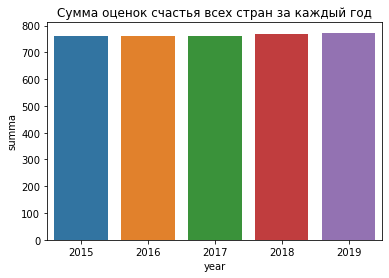

In [25]:
ax = sns.barplot(x="year", y="summa",
data=years).set_title('Сумма оценок счастья всех стран за каждый год')

In [26]:
happiness_scores['scores'] = happiness_scores.sum(axis=1)
happiness_scores = happiness_scores.sort_values('scores',
ascending=False).reset_index(drop=True)
happiness_scores.index = np.arange(1, len(happiness_scores)+1)

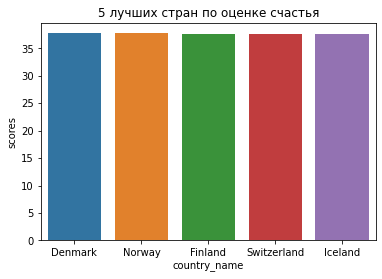

In [27]:
ax = sns.barplot(x="country_name", y="scores",
data=happiness_scores.head()).set_title('5 лучших стран по оценке счастья')

In [28]:
y_2015_lifespan = y_2015[['country_name', 'region', 'lifespan_2015']]
y_2016_lifespan = y_2016[['country_name', 'lifespan_2016']]
y_2017_lifespan = y_2017[['country_name', 'lifespan_2017']]
y_2018_lifespan = y_2018[['country_name', 'lifespan_2018']]
y_2019_lifespan = y_2019[['country_name', 'lifespan_2019']]

In [29]:
world_lifespan = y_2015_lifespan
world_lifespan = world_lifespan.merge(y_2016_lifespan, how= 'inner', on = 'country_name')
world_lifespan = world_lifespan.merge(y_2017_lifespan, how= 'inner', on = 'country_name')
world_lifespan = world_lifespan.merge(y_2018_lifespan, how= 'inner', on = 'country_name')
world_lifespan = world_lifespan.merge(y_2019_lifespan, how= 'inner', on = 'country_name')

In [30]:
s_lifespan_2015 = world_lifespan.lifespan_2015.sum()
s_lifespan_2016 = world_lifespan.lifespan_2016.sum()
s_lifespan_2017 = world_lifespan.lifespan_2017.sum()
s_lifespan_2018 = world_lifespan.lifespan_2018.sum()
s_lifespan_2019 = world_lifespan.lifespan_2019.sum()

In [31]:
lifespans = pd.DataFrame({'year': ['2015', '2016', '2017', '2018', '2019'], 'summa': [s_lifespan_2015, s_lifespan_2016, s_lifespan_2017, s_lifespan_2018, s_lifespan_2019]})

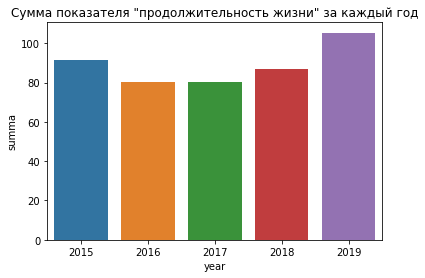

In [32]:
ax = sns.barplot(x="year", y="summa", data=lifespans).set_title('Сумма показателя "продолжительность жизни" за каждый год')

In [33]:
world_lifespan['scores'] = world_lifespan.sum(axis=1) 
world_lifespan = world_lifespan.sort_values('scores', ascending=False).reset_index(drop=True)
world_lifespan.index = np.arange(1, len(world_lifespan)+1)

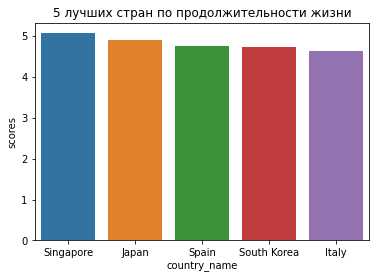

In [34]:
ax = sns.barplot(x="country_name", y="scores", data=world_lifespan.head()).set_title('5 лучших стран по продолжительности жизни')

In [35]:
y_2015_freedom = y_2015[['country_name', 'region', 'freedom_2015']]
y_2016_freedom = y_2016[['country_name', 'freedom_2016']]
y_2017_freedom = y_2017[['country_name', 'freedom_2017']]
y_2018_freedom = y_2018[['country_name', 'freedom_2018']]
y_2019_freedom = y_2019[['country_name', 'freedom_2019']]

In [36]:
freedom_of_choices = y_2015_freedom
freedom_of_choices = freedom_of_choices.merge(y_2016_freedom, how= 'inner', on = 'country_name')
freedom_of_choices = freedom_of_choices.merge(y_2017_freedom, how= 'inner', on = 'country_name')
freedom_of_choices = freedom_of_choices.merge(y_2018_freedom, how= 'inner', on = 'country_name')
freedom_of_choices = freedom_of_choices.merge(y_2019_freedom, how= 'inner', on = 'country_name')

In [37]:
s_freedom_2015 = freedom_of_choices.freedom_2015.sum()
s_freedom_2016 = freedom_of_choices.freedom_2016.sum()
s_freedom_2017 = freedom_of_choices.freedom_2017.sum()
s_freedom_2018 = freedom_of_choices.freedom_2018.sum()
s_freedom_2019 = freedom_of_choices.freedom_2019.sum()

In [38]:
freedoms = pd.DataFrame({'year': ['2015', '2016', '2017', '2018', '2019'], 'summa': [s_freedom_2015, s_freedom_2016, s_freedom_2017, s_freedom_2018, s_freedom_2019]})

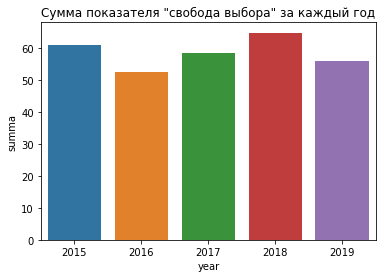

In [39]:
ax = sns.barplot(x="year", y="summa", data=freedoms).set_title('Сумма показателя "свобода выбора" за каждый год')

In [40]:
freedom_of_choices['scores'] = freedom_of_choices.sum(axis=1) 
freedom_of_choices = freedom_of_choices.sort_values('scores', ascending=False).reset_index(drop=True)
freedom_of_choices.index = np.arange(1, len(freedom_of_choices)+1)

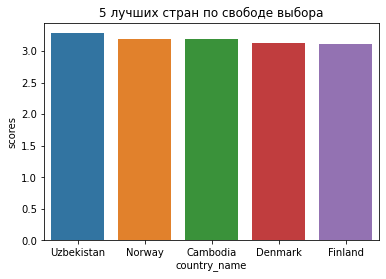

In [41]:
ax = sns.barplot(x="country_name", y="scores", data=freedom_of_choices.head()).set_title('5 лучших стран по свободе выбора')

In [42]:
y_2015_gdp = y_2015[['country_name', 'region', 'GDP_2015']]
y_2016_gdp = y_2016[['country_name', 'GDP_2016']]
y_2017_gdp = y_2017[['country_name', 'GDP_2017']]
y_2018_gdp = y_2018[['country_name', 'GDP_2018']]
y_2019_gdp = y_2019[['country_name', 'GDP_2019']]

In [43]:
GDP = y_2015_gdp
GDP = GDP.merge(y_2016_gdp, how= 'inner', on = 'country_name')
GDP = GDP.merge(y_2017_gdp, how= 'inner', on = 'country_name')
GDP = GDP.merge(y_2018_gdp, how= 'inner', on = 'country_name')
GDP = GDP.merge(y_2019_gdp, how= 'inner', on = 'country_name')

In [44]:
s_GDP_2015 = GDP.GDP_2015.sum()
s_GDP_2016 = GDP.GDP_2016.sum()
s_GDP_2017 = GDP.GDP_2017.sum()
s_GDP_2018 = GDP.GDP_2018.sum()
s_GDP_2019 = GDP.GDP_2019.sum()

In [45]:
sum_GDP = pd.DataFrame({'year': ['2015', '2016', '2017', '2018', '2019'], 'summa': [s_GDP_2015, s_GDP_2016, s_GDP_2017, s_GDP_2018, s_GDP_2019]})

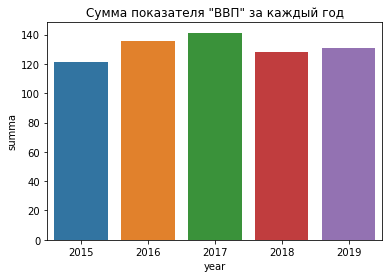

In [46]:
ax = sns.barplot(x="year", y="summa", data=sum_GDP).set_title('Сумма показателя "ВВП" за каждый год')

In [47]:
GDP['scores'] = GDP.sum(axis=1) 
GDP = GDP.sort_values('scores', ascending=False).reset_index(drop=True)
GDP.index = np.arange(1, len(GDP)+1)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Qatar'),
  Text(1, 0, 'United Arab Emirates'),
  Text(2, 0, 'Luxembourg'),
  Text(3, 0, 'Singapore'),
  Text(4, 0, 'Kuwait')])

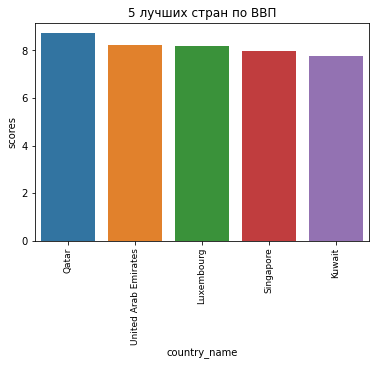

In [48]:
ax = sns.barplot(x="country_name", y="scores", data=GDP.head()).set_title('5 лучших стран по ВВП')
plt.xticks(rotation = "90",size = 9)

In [49]:
y_2015_generosity = y_2015[['country_name', 'region', 'generosity_2015']]
y_2016_generosity = y_2016[['country_name', 'generosity_2016']]
y_2017_generosity = y_2017[['country_name', 'generosity_2017']]
y_2018_generosity = y_2018[['country_name', 'generosity_2018']]
y_2019_generosity = y_2019[['country_name', 'generosity_2019']]

In [50]:
generosity = y_2015_generosity
generosity = generosity.merge(y_2016_generosity, how= 'inner', on = 'country_name')
generosity = generosity.merge(y_2017_generosity, how= 'inner', on = 'country_name')
generosity = generosity.merge(y_2018_generosity, how= 'inner', on = 'country_name')
generosity = generosity.merge(y_2019_generosity, how= 'inner', on = 'country_name')

In [51]:
s_generosity_2015 = generosity.generosity_2015.sum()
s_generosity_2016 = generosity.generosity_2016.sum()
s_generosity_2017 = generosity.generosity_2017.sum()
s_generosity_2018 = generosity.generosity_2018.sum()
s_generosity_2019 = generosity.generosity_2019.sum()

In [52]:
sum_generosity = pd.DataFrame({'year': ['2015', '2016', '2017', '2018', '2019'], 'summa': [s_generosity_2015, s_generosity_2016, s_generosity_2017, s_generosity_2018, s_generosity_2019]})

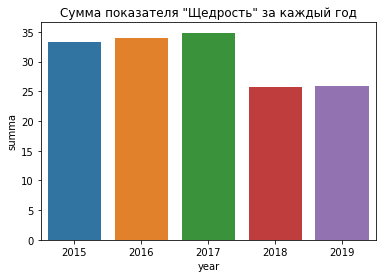

In [53]:
ax = sns.barplot(x="year", y="summa", data=sum_generosity).set_title('Сумма показателя "Щедрость" за каждый год')

In [54]:
generosity['scores'] = generosity.sum(axis=1) 
generosity = generosity.sort_values('scores', ascending=False).reset_index(drop=True)
generosity.index = np.arange(1, len(generosity)+1)

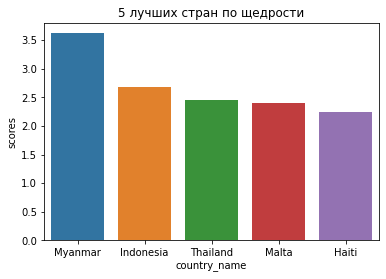

In [55]:
ax = sns.barplot(x="country_name", y="scores", data=generosity.head()).set_title('5 лучших стран по щедрости')

In [56]:
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = y_2015.country_name,
           locationmode = 'country names',
           z = y_2015.happiness_score_2015, 
           text = y_2015.country_name,
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Оценка счастья за 2015 год')
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

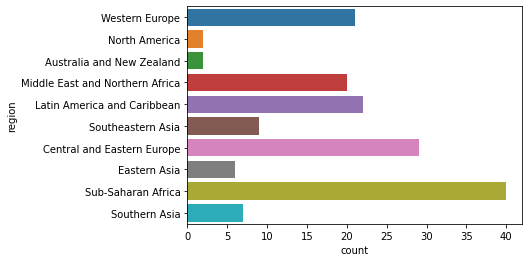

In [57]:
ax = sns.countplot(y="region", data=y_2015)

In [58]:
go.Figure(data=[go.Pie(labels=y_2015.region.value_counts().index,
values=y_2015.region.value_counts().values)])

In [59]:
y_2015_f = y_2015_df.rename(columns={'Country': 'country_name',
                                'Region': 'region',
                                'Happiness Rank': 'happiness_rank',
                                'Happiness Score': 'happiness_score',
                               'Health (Life Expectancy)': 'lifespan',
                               'Freedom': 'freedom',
                               'Economy (GDP per Capita)': 'GDP',
                               'Generosity': 'generosity'})

In [60]:
y_2016_f = y_2016_df.rename(columns={'Country': 'country_name',
                                'Region': 'region',
                                'Happiness Rank': 'happiness_rank',
                                'Happiness Score': 'happiness_score',
                               'Health (Life Expectancy)': 'lifespan',
                               'Freedom': 'freedom',
                               'Economy (GDP per Capita)': 'GDP',
                               'Generosity': 'generosity'})

In [61]:
y_2017_f = y_2017_df.rename(columns={'Country': 'country_name', 
                                'Happiness.Score': 'happiness_score',
                                'Happiness.Rank': 'happiness_rank',
                               'Health..Life.Expectancy.': 'lifespan',
                               'Freedom': 'freedom',
                               'Economy..GDP.per.Capita.': 'GDP',
                               'Generosity': 'generosity'})

In [62]:
y_2018_f = y_2018_df.rename(columns={'Country or region': 'country_name',
                                'Overall rank': 'happiness_rank',
                                'Score': 'happiness_score',
                               'Healthy life expectancy': 'lifespan',
                               'Freedom to make life choices': 'freedom',
                               'GDP per capita': 'GDP',
                               'Generosity': 'generosity'})

In [63]:
y_2019_f = y_2019_df.rename(columns={'Country or region': 'country_name',
                                'Overall rank': 'happiness_rank',
                                'Score': 'happiness_score',
                               'Healthy life expectancy': 'lifespan',
                               'Freedom to make life choices': 'freedom',
                               'GDP per capita': 'GDP',
                               'Generosity': 'generosity'})

In [64]:
y_2015_f.insert(0, 'year', 2015)
y_2016_f.insert(0, 'year', 2016)
y_2017_f.insert(0, 'year', 2017)
y_2018_f.insert(0, 'year', 2018)
y_2019_f.insert(0, 'year', 2019)

In [65]:
y_2017_f = y_2017_f.merge(y_2016_f,left_on = 'country_name', right_on = 'country_name', how = 'inner')
y_2018_f = y_2018_f.merge(y_2016_f,left_on = 'country_name', right_on = 'country_name', how = 'inner')
y_2019_f = y_2019_f.merge(y_2015_f,left_on = 'country_name', right_on = 'country_name', how = 'inner')

In [66]:
y_2017_f.drop(columns = ['year_y', 'happiness_rank_y','GDP_y', 'lifespan_y', 'freedom_y', 'generosity_y', 'happiness_score_y'], inplace = True)
y_2018_f.drop(columns = ['year_y', 'happiness_rank_y','GDP_y', 'lifespan_y', 'freedom_y', 'generosity_y', 'happiness_score_y'], inplace = True)
y_2019_f.drop(columns = ['year_y', 'happiness_rank_y','GDP_y', 'lifespan_y', 'freedom_y', 'generosity_y', 'happiness_score_y'], inplace = True)

In [67]:
y_2017_f = y_2017_f.rename(columns={'year_x': 'year', 
                                'happiness_score_x': 'happiness_score',
                                'happiness_rank_x': 'happiness_rank',
                               'lifespan_x': 'lifespan',
                               'freedom_x': 'freedom',
                               'GDP_x': 'GDP',
                               'generosity_x': 'generosity'})

In [68]:
y_2018_f = y_2018_f.rename(columns={'year_x': 'year', 
                                'happiness_score_x': 'happiness_score',
                                'happiness_rank_x': 'happiness_rank',
                               'lifespan_x': 'lifespan',
                               'freedom_x': 'freedom',
                               'GDP_x': 'GDP',
                               'generosity_x': 'generosity'})

In [69]:
y_2019_f = y_2019_f.rename(columns={'year_x': 'year', 
                                'happiness_score_x': 'happiness_score',
                                'happiness_rank_x': 'happiness_rank',
                               'lifespan_x': 'lifespan',
                               'freedom_x': 'freedom',
                               'GDP_x': 'GDP',
                               'generosity_x': 'generosity'})

In [70]:
final = pd.concat([y_2015_f, y_2016_f, y_2017_f, y_2018_f, y_2019_f], 
                     ignore_index=True)

In [73]:
final

,year,country_name,region,happiness_rank,happiness_score,GDP,lifespan,freedom,generosity
0,2015,Switzerland,Western Europe,1,7.587,1.39651,0.94143,0.66557,0.29678
1,2015,Iceland,Western Europe,2,7.561,1.30232,0.94784,0.62877,0.43630
2,2015,Denmark,Western Europe,3,7.527,1.32548,0.87464,0.64938,0.34139
3,2015,Norway,Western Europe,4,7.522,1.45900,0.88521,0.66973,0.34699
4,2015,Canada,North America,5,7.427,1.32629,0.90563,0.63297,0.45811
...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,Middle East and Northern Africa,151,3.380,0.28700,0.46300,0.14300,0.10800
761,2019,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.61400,0.55500,0.21700
762,2019,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.49900,0.41700,0.27600
763,2019,Afghanistan,Southern Asia,154,3.203,0.35000,0.36100,0.00000,0.15800


In [71]:
russia = final.loc[final['country_name'] == 'Russia'].reset_index(drop=True)
russia

,year,country_name,region,happiness_rank,happiness_score,GDP,lifespan,freedom,generosity
0,2015,Russia,Central and Eastern Europe,64,5.716,1.137640,0.669260,0.366790,0.001990
1,2016,Russia,Central and Eastern Europe,56,5.856,1.232280,0.589910,0.326820,0.027360
2,2017,Russia,Central and Eastern Europe,49,5.963,1.281778,0.547349,0.373783,0.052264
3,2018,Russia,Central and Eastern Europe,59,5.810,1.151000,0.599000,0.399000,0.065000
4,2019,Russia,Central and Eastern Europe,68,5.648,1.183000,0.726000,0.334000,0.082000


([<matplotlib.axis.XTick at 0xde95e349d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

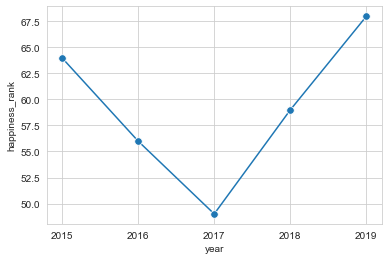

In [72]:
sns.set_style("whitegrid")
sns.lineplot(x="year", y="happiness_rank",data=russia, marker='.', markersize=15)
plt.xticks([2015, 2016, 2017, 2018, 2019])

In [73]:
df_region = final.loc[final['region'] == 'Central and Eastern Europe'].reset_index(drop=True)

In [74]:
fig = px.scatter(df_region,
                x = 'lifespan',
                y = 'happiness_score',
                color = 'country_name', 
                template='plotly_dark',
                facet_col = 'year',
                title = 'Lifespan vs Happiness Score for Central and Eastern Europe',
                )
fig.show()

In [75]:
df_region_1 = df_region[df_region['country_name'].isin(['Uzbekistan', 'Moldova', 'Kazakhstan',
                                                        'Belarus', 'Russia', 'Turkmenistan', 'Kyrgyzstan'])]
fig = px.scatter(df_region_1,
                x = 'generosity',
                y = 'happiness_score',
                color = 'country_name',
                template='plotly_dark',
                text = 'year',
                size = 'GDP',
                title = 'Generosity vs Happiness Score for Central and Eastern Europe, with Bubble size indication of GDP'
                )
fig.show()

In [76]:
labelencoder = LabelEncoder()
final['region'] = labelencoder.fit_transform(final['region'])

In [65]:
X = final [['region', 'GDP', 'lifespan', 'freedom', 'generosity']]
y = final.happiness_score

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [67]:
model_lr = LinearRegression()

In [68]:
model_lr.fit(X_train,y_train)
model_lr.score(X_train,y_train)

0.7332885749406022

In [69]:
model_lr.coef_

array([-0.00314127,  1.3536179 ,  1.16148905,  2.03726542,  0.51171202])

In [70]:
model_lr.intercept_ 

2.500510182646206

In [71]:
y_pred_test = model_lr.predict(X_test) 
y_pred_test[:5]

array([3.98518288, 3.82649752, 5.42474621, 5.09468418, 6.72452972])

In [72]:
mse_test_lr = mean_squared_error(y_test, y_pred_test)  
SSE = np.sum((y_pred_test-y_test)**2)  
SST = np.sum((y_test-np.mean(y_train))**2)  
r2_test_lr = 1 - SSE/SST  
print(model_lr.score(X_test,y_test))
print("Test MSE: ", mse_test_lr)
print("Test R2: ", r2_test_lr)

0.7528205298852751
Test MSE:  0.32734278225422947
Test R2:  0.7528700213589536


In [73]:
model_lr1 = LinearRegression()
model_lr1.fit(X_train[['GDP']],y_train)
print(model_lr1.score(X_train[['GDP']],y_train))
print(model_lr1.coef_)
print(model_lr1.intercept_)

0.6178164286230875
[2.17661191]
3.3801025344570745


In [74]:
y_pred = model_lr1.predict(final[['GDP']])
y_pred[:5]

array([6.41976283, 6.21474775, 6.26515809, 6.55577931, 6.26692114])

Text(0.5, 1.0, 'Линейная регрессия зависимости оценки счастья от показателя ВВП')

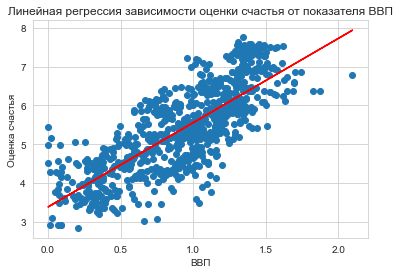

In [77]:
plt.scatter(final[['GDP']],final['happiness_score']) 
plt.plot(final[['GDP']],y_pred,'r')
plt.xlabel('ВВП')
plt.ylabel('Оценка счастья')
plt.title('Линейная регрессия зависимости оценки счастья от показателя ВВП')

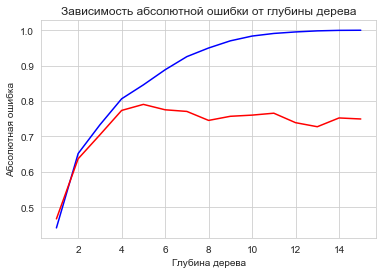

In [78]:
max_depths = np.linspace(1, 15, 15, endpoint=True) 
train_results = []
test_results = [] 
for max_depth in max_depths:
   dt = DecisionTreeRegressor(max_depth=max_depth) 
   dt.fit(X_train, y_train) 
   train_pred = dt.predict(X_train) 
   mse_train_dt = mean_squared_error(y_train, train_pred) 
   SSE = np.sum((train_pred-y_train)**2) 
   SST = np.sum((y_train-np.mean(y_train))**2) 
   r2_train_dt = 1 - SSE/SST 
   train_results.append(r2_train_dt)

   test_pred = dt.predict(X_test)
   mse_test_dt = mean_squared_error(y_test, test_pred)
   SSE = np.sum((test_pred -y_test)**2)
   SST = np.sum((y_test-np.mean(y_test))**2)
   r2_test_dt = 1 - SSE/SST
   test_results.append(r2_test_dt)
   

line1 = plt.plot(max_depths, train_results, 'b')
line2 = plt.plot(max_depths, test_results, 'r')
plt.ylabel('Абсолютная ошибка')
plt.xlabel('Глубина дерева')
plt.title('Зависимость абсолютной ошибки от глубины дерева')
plt.show()

In [79]:
model_dt = DecisionTreeRegressor(max_depth=4)

In [80]:
model_dt.fit(X_train,y_train) 
model_dt.score(X_train,y_train)

0.806415301909233

In [81]:
y_pred_test_ds = model_dt.predict(X_test)

In [82]:
mse_test_dt = mean_squared_error(y_test, y_pred_test_ds)  
SSE = np.sum((y_pred_test_ds-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test_dt = 1 - SSE/SST
print(model_dt.score(X_test,y_test)) 
print("Test MSE: ", mse_test_dt)
print("Test R2: ", r2_test_dt)

0.7735853379916278
Test MSE:  0.29984369401945893
Test R2:  0.7736306718346043


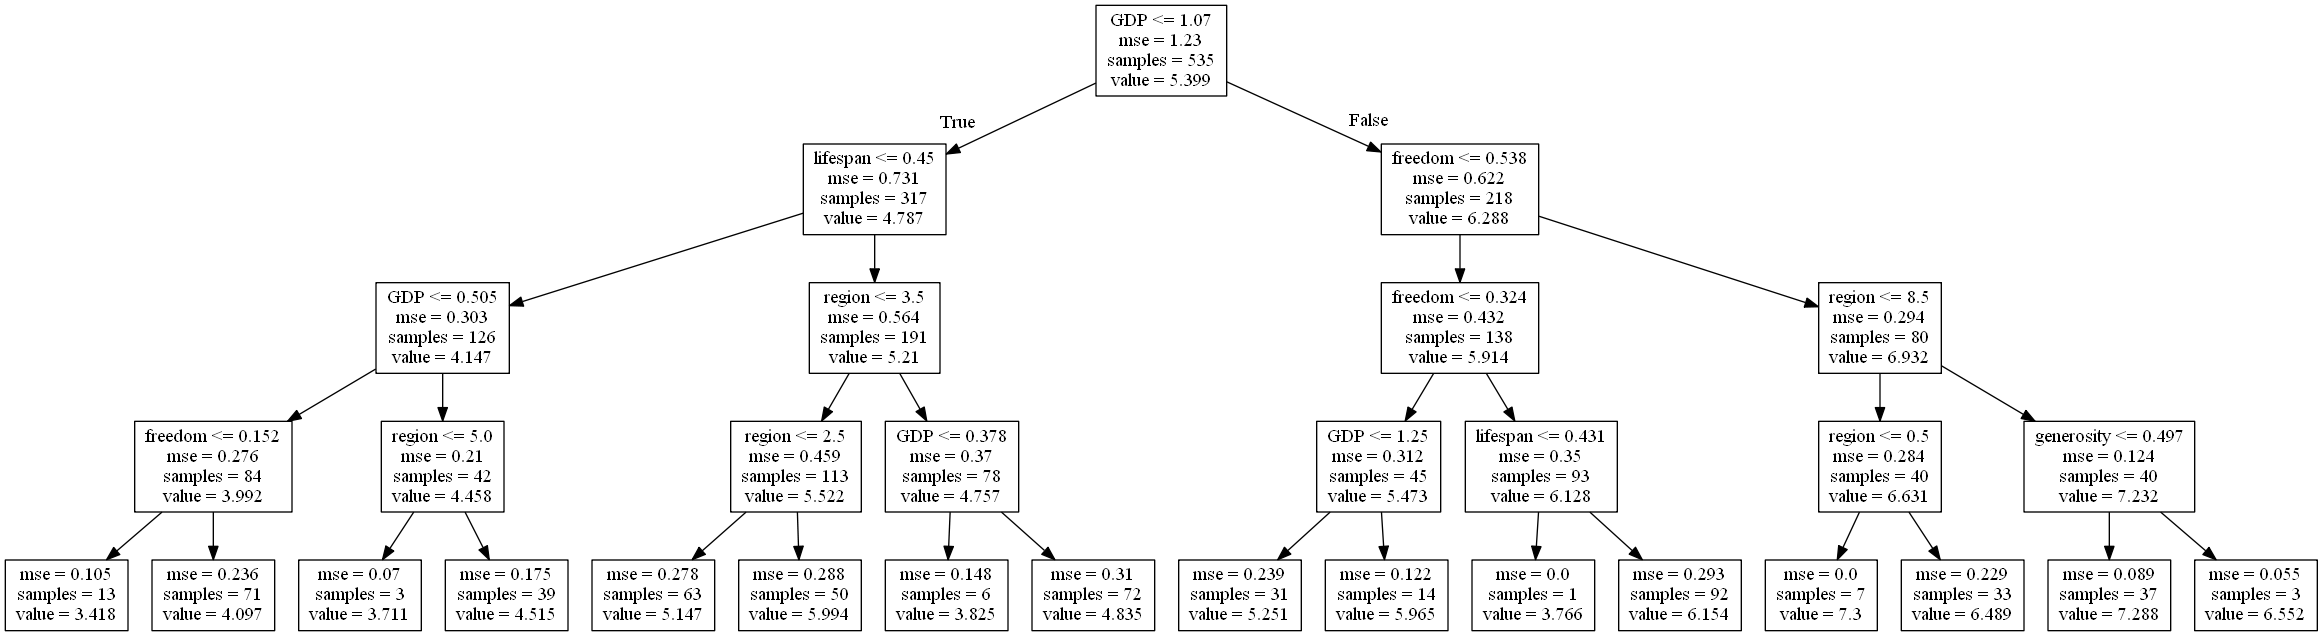

In [83]:
export_graphviz(model_dt,out_file='DecisionTree.dot',feature_names=X_train.columns)
! dot -Tpng DecisionTree.dot -o DecisionTree.png
Image("DecisionTree.png")